In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure

from scipy import stats

In [2]:
df_BMRI = pd.read_csv('Data - BMRI.JK_LAST5Years.csv')
df_dt = pd.read_csv('apriljuli_pred_3feb.csv')

In [3]:
df_BMRI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-04,5650.0,5675.0,5562.5,5675.0,4699.963867,20555200.0
1,2017-01-05,5600.0,5662.5,5575.0,5625.0,4658.554199,33277200.0
2,2017-01-06,5675.0,5712.5,5637.5,5687.5,4710.316406,27168800.0
3,2017-01-09,5712.5,5712.5,5612.5,5637.5,4668.906250,18174600.0
4,2017-01-10,5687.5,5700.0,5625.0,5700.0,4720.668945,12402400.0
...,...,...,...,...,...,...,...
1255,2021-12-24,7100.0,7150.0,6950.0,7050.0,7050.000000,27451100.0
1256,2021-12-27,7050.0,7100.0,6975.0,7000.0,7000.000000,17048200.0
1257,2021-12-28,7050.0,7050.0,6975.0,7050.0,7050.000000,19917700.0
1258,2021-12-29,7075.0,7125.0,7000.0,7100.0,7100.000000,10430100.0


In [4]:
df_BMRI = df_BMRI.sort_values(by='Date')

In [5]:
df_BMRI[df_BMRI['Date'] == '2019-04-01']

,Date,Open,High,Low,Close,Adj Close,Volume
577,2019-04-01,7500.0,7525.0,7450.0,7500.0,6687.57373,28945300.0


In [6]:
df_BMRI[df_BMRI['Date'] == '2019-07-31']

,Date,Open,High,Low,Close,Adj Close,Volume
664,2019-07-31,7875.0,7975.0,7800.0,7975.0,7341.092773,29504400.0


In [7]:
df_BMRI = df_BMRI.iloc[577:665]
df_BMRI.reset_index(drop=True, inplace=True)

In [8]:
df_BMRI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,7500.0,7525.0,7450.0,7500.0,6687.573730,28945300.0
1,2019-04-02,7525.0,7525.0,7325.0,7425.0,6620.698242,18436400.0
2,2019-04-03,7425.0,7425.0,7425.0,7425.0,6620.698242,0.0
3,2019-04-04,7500.0,7700.0,7500.0,7675.0,6843.616699,59541700.0
4,2019-04-05,7675.0,7675.0,7550.0,7550.0,6732.157227,20267100.0
...,...,...,...,...,...,...,...
83,2019-07-25,7725.0,7800.0,7700.0,7800.0,7180.002441,38731000.0
84,2019-07-26,7650.0,7775.0,7625.0,7750.0,7133.977051,31363700.0
85,2019-07-29,7825.0,7825.0,7675.0,7800.0,7180.002441,27603200.0
86,2019-07-30,7800.0,7975.0,7725.0,7950.0,7318.079590,43537800.0


In [9]:
df_BMRI['Date'] = pd.to_datetime(df_BMRI['Date'], errors='coerce')
df_dt['Date'] = pd.to_datetime(df_dt['Date'], errors='coerce')

In [10]:
df_dt

,Date,Stemming,Label,Label Predict
0,2019-04-01,selamat pagi ibu mulia ikut cara baru saldo em...,1,1
1,2019-04-01,id halo bapak candra mohon maaf atas ketidakny...,1,1
2,2019-04-01,saya top up id pakai mandiri mobile belum juga...,1,1
3,2019-04-01,baik ibu sarana apabila ibu sudah kirim pesan ...,1,1
4,2019-04-01,kolaborasi bsm dengan hijup untuk jadi mitra l...,1,1
...,...,...,...,...
18498,2019-07-31,jadi eror saldo bank mandiri tempo hari ada ju...,-1,-1
18499,2019-07-31,yang hebat itu bmri fatal eror hilang saldo na...,-1,-1
18500,2019-07-31,tanda banyak ketidakberesan badan usaha milik ...,-1,-1
18501,2019-07-31,gilee ini bmri suka banget sama begini,0,-1


In [11]:
df_dt['Label Predict'].value_counts()

-1    8237
 1    6239
 0    4027
Name: Label Predict, dtype: int64

# bymonth

### Preprose Aggregate Sent

In [12]:
sum_label_sent = df_dt.groupby(['Date','Label Predict']).agg({'Label Predict' : 'count'}).rename(columns={'Label Predict' : 'SumLabelPredict'})

In [13]:
sum_label_sent

SumLabelPredict
Date       Label Predict                 
2019-04-01 -1                          24
            0                          57
            1                         317
2019-04-02 -1                          16
            0                          70
...                                   ...
2019-07-30  0                          28
            1                          26
2019-07-31 -1                          46
            0                          11
            1                           7

[330 rows x 1 columns]

In [14]:
sum_label_sent.reset_index(inplace=True)
sum_label_sent

,Date,Label Predict,SumLabelPredict
0,2019-04-01,-1,24
1,2019-04-01,0,57
2,2019-04-01,1,317
3,2019-04-02,-1,16
4,2019-04-02,0,70
...,...,...,...
325,2019-07-30,0,28
326,2019-07-30,1,26
327,2019-07-31,-1,46
328,2019-07-31,0,11


### Prepross BMRI

In [26]:
df_BMRI.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [27]:
df_BMRI.dropna(inplace=True)
df_BMRI.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
df_BMRI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,7500.0,7525.0,7450.0,7500.0,6687.573730,28945300.0
1,2019-04-02,7525.0,7525.0,7325.0,7425.0,6620.698242,18436400.0
2,2019-04-03,7425.0,7425.0,7425.0,7425.0,6620.698242,0.0
3,2019-04-04,7500.0,7700.0,7500.0,7675.0,6843.616699,59541700.0
4,2019-04-05,7675.0,7675.0,7550.0,7550.0,6732.157227,20267100.0
...,...,...,...,...,...,...,...
83,2019-07-25,7725.0,7800.0,7700.0,7800.0,7180.002441,38731000.0
84,2019-07-26,7650.0,7775.0,7625.0,7750.0,7133.977051,31363700.0
85,2019-07-29,7825.0,7825.0,7675.0,7800.0,7180.002441,27603200.0
86,2019-07-30,7800.0,7975.0,7725.0,7950.0,7318.079590,43537800.0


### Visual

## TESTING

## LABEL MANUAL

In [79]:
df_dt

,Date,Stemming,Label,Label Predict
0,2019-04-01,selamat pagi ibu mulia ikut cara baru saldo em...,1,1
1,2019-04-01,id halo bapak candra mohon maaf atas ketidakny...,1,1
2,2019-04-01,saya top up id pakai mandiri mobile belum juga...,1,1
3,2019-04-01,baik ibu sarana apabila ibu sudah kirim pesan ...,1,1
4,2019-04-01,kolaborasi bsm dengan hijup untuk jadi mitra l...,1,1
...,...,...,...,...
18498,2019-07-31,jadi eror saldo bank mandiri tempo hari ada ju...,-1,-1
18499,2019-07-31,yang hebat itu bmri fatal eror hilang saldo na...,-1,-1
18500,2019-07-31,tanda banyak ketidakberesan badan usaha milik ...,-1,-1
18501,2019-07-31,gilee ini bmri suka banget sama begini,0,-1


In [80]:
sum_label_sent_manual = df_dt.groupby(['Date','Label']).agg({'Label' : 'count'}).rename(columns={'Label' : 'SumLabel'})
sum_label_sent_manual.reset_index(inplace=True)
sum_label_sent_manual

,Date,Label,SumLabel
0,2019-04-01,-1,5
1,2019-04-01,0,45
2,2019-04-01,1,348
3,2019-04-02,-1,2
4,2019-04-02,0,59
...,...,...,...
311,2019-07-30,0,31
312,2019-07-30,1,35
313,2019-07-31,-1,35
314,2019-07-31,0,19


In [81]:
sum_label_sent_manual_final_neg = sum_label_sent_manual[sum_label_sent_manual['Label'] == -1]
sum_label_sent_manual_final_pos = sum_label_sent_manual[sum_label_sent_manual['Label'] == 1]
sum_label_sent_manual_final_net = sum_label_sent_manual[sum_label_sent_manual['Label'] == 0]

In [82]:
sum_label_sent_manual_final_neg.reset_index(drop=True,inplace=True)
sum_label_sent_manual_final_pos.reset_index(drop=True,inplace=True)
sum_label_sent_manual_final_net.reset_index(drop=True,inplace=True)

In [83]:
df_corr_manual_neg = df_BMRI.merge(sum_label_sent_manual_final_neg, on = ['Date'])
df_corr_manual_neg.corr()

,Open,High,Low,Close,Adj Close,Volume,Label,SumLabel
Open,1.000000,0.946211,0.949829,0.899534,0.889189,0.077047,NaN,0.106931
High,0.946211,1.000000,0.933666,0.945388,0.910212,0.246082,NaN,0.095967
Low,0.949829,0.933666,1.000000,0.958866,0.934733,-0.008243,NaN,0.090630
Close,0.899534,0.945388,0.958866,1.000000,0.962319,0.080680,NaN,0.113809
Adj Close,0.889189,0.910212,0.934733,0.962319,1.000000,0.078869,NaN,0.171043
Volume,0.077047,0.246082,-0.008243,0.080680,0.078869,1.000000,NaN,-0.014500
Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumLabel,0.106931,0.095967,0.090630,0.113809,0.171043,-0.014500,NaN,1.000000


In [84]:
df_corr_manual_pos = df_BMRI.merge(sum_label_sent_manual_final_pos, on = ['Date'])
df_corr_manual_pos.corr()

,Open,High,Low,Close,Adj Close,Volume,Label,SumLabel
Open,1.000000,0.949224,0.959183,0.909093,0.890869,0.088462,NaN,-0.178574
High,0.949224,1.000000,0.934875,0.962224,0.922212,0.227611,NaN,-0.193125
Low,0.959183,0.934875,1.000000,0.950916,0.926306,-0.036546,NaN,-0.191245
Close,0.909093,0.962224,0.950916,1.000000,0.953469,0.076655,NaN,-0.214874
Adj Close,0.890869,0.922212,0.926306,0.953469,1.000000,0.086481,NaN,-0.381556
Volume,0.088462,0.227611,-0.036546,0.076655,0.086481,1.000000,NaN,-0.049234
Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumLabel,-0.178574,-0.193125,-0.191245,-0.214874,-0.381556,-0.049234,NaN,1.000000


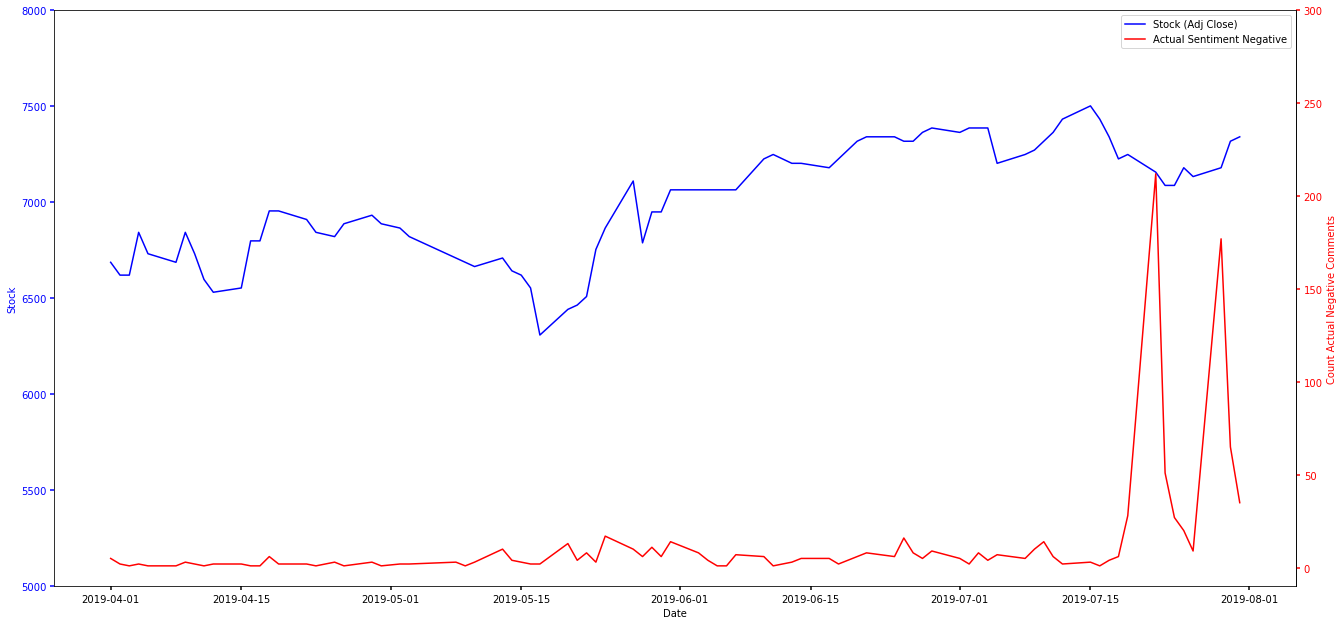

In [93]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, host = plt.subplots()
fig.subplots_adjust(right=3, top = 6,bottom = 4)

# par1 = host.twinx()
par2 = host.twinx()


make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(df_corr_manual_neg['Date'], df_corr_manual_neg['Adj Close'], "b-", label="Stock (Adj Close)")
# p2, = par1.plot(sum_label_sent_final_neg['Date'], sum_label_sent_final_neg['SumLabel'], "r-", label="Negative")
p3, = par2.plot(df_corr_manual_neg['Date'], df_corr_manual_neg['SumLabel'], "r-", label="Actual Sentiment Negative")

# host.set_xlim(0, 2)
host.set_ylim(5000,8000)
# par1.set_ylim(sum_label_sent_final_neg['SumLabel'].min(), sum_label_sent_final_neg['SumLabel'].max())
par2.set_ylim(-10,300)
# par2.set_ylim(7000,0)

host.set_xlabel("Date")
host.set_ylabel("Stock")
# par1.set_ylabel("Negative")
par2.set_ylabel("Count Actual Negative Comments")

host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

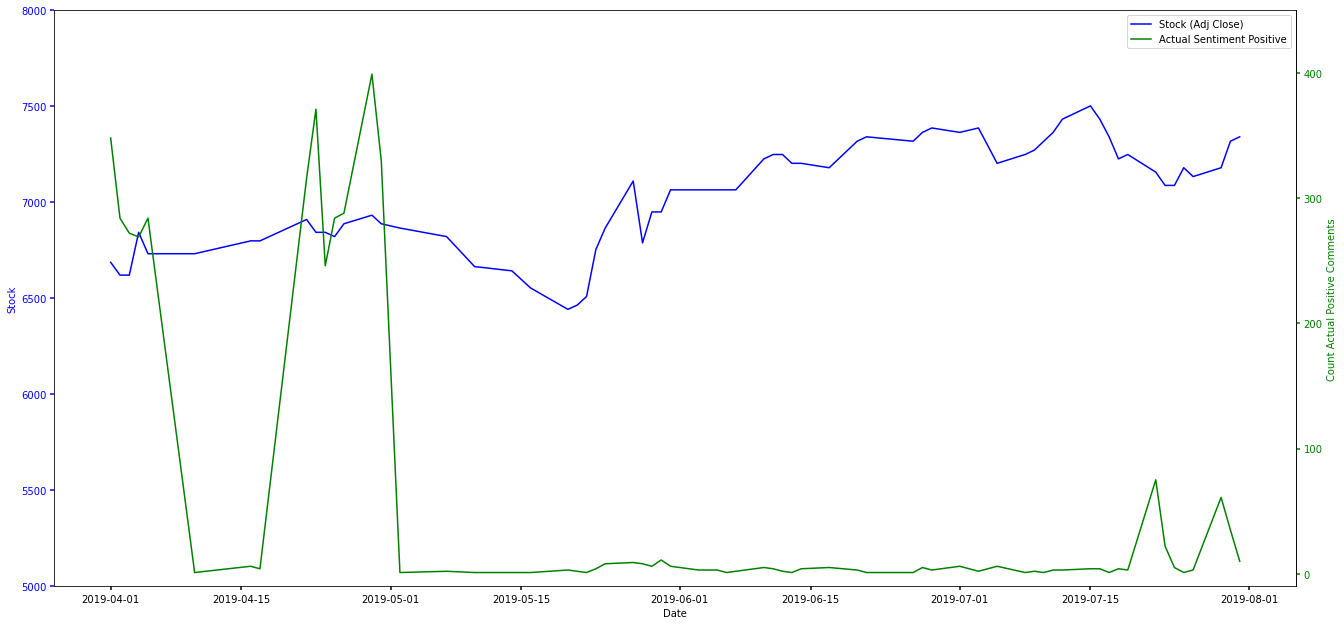

In [94]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, host = plt.subplots()
fig.subplots_adjust(right=3, top = 6,bottom = 4)

# par1 = host.twinx()
par2 = host.twinx()


make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(df_corr_manual_pos['Date'], df_corr_manual_pos['Adj Close'], "b-", label="Stock (Adj Close)")
# p2, = par1.plot(sum_label_sent_final_neg['Date'], sum_label_sent_final_neg['SumLabel'], "r-", label="Negative")
p3, = par2.plot(df_corr_manual_pos['Date'], df_corr_manual_pos['SumLabel'], "g-", label="Actual Sentiment Positive")

# host.set_xlim(0, 2)
host.set_ylim(5000, 8000)
# par1.set_ylim(sum_label_sent_final_neg['SumLabel'].min(), sum_label_sent_final_neg['SumLabel'].max())
par2.set_ylim(-10,450)

host.set_xlabel("Date")
host.set_ylabel("Stock")
# par1.set_ylabel("Negative")
par2.set_ylabel("Count Actual Positive Comments")

host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

## LABEL PREDICT

In [64]:
sum_label_sent

,Date,Label Predict,SumLabelPredict
0,2019-04-01,-1,24
1,2019-04-01,0,57
2,2019-04-01,1,317
3,2019-04-02,-1,16
4,2019-04-02,0,70
...,...,...,...
325,2019-07-30,0,28
326,2019-07-30,1,26
327,2019-07-31,-1,46
328,2019-07-31,0,11


In [65]:
sum_label_sent_min = sum_label_sent[sum_label_sent['Label Predict'] == -1]
sum_label_sent_plus = sum_label_sent[sum_label_sent['Label Predict'] == 1]
sum_label_sent_ntl = sum_label_sent[sum_label_sent['Label Predict'] == 0]

In [66]:
sum_label_sent_min

,Date,Label Predict,SumLabelPredict
0,2019-04-01,-1,24
3,2019-04-02,-1,16
6,2019-04-03,-1,20
9,2019-04-04,-1,18
12,2019-04-05,-1,16
...,...,...,...
315,2019-07-27,-1,12
318,2019-07-28,-1,26
321,2019-07-29,-1,211
324,2019-07-30,-1,77


In [67]:
df_corr_sent_min = df_BMRI.merge(sum_label_sent_min, on = ['Date'])
df_corr_sent_min

,Date,Open,High,Low,Close,Adj Close,Volume,Label Predict,SumLabelPredict
0,2019-04-01,7500.0,7525.0,7450.0,7500.0,6687.573730,28945300.0,-1,24
1,2019-04-02,7525.0,7525.0,7325.0,7425.0,6620.698242,18436400.0,-1,16
2,2019-04-03,7425.0,7425.0,7425.0,7425.0,6620.698242,0.0,-1,20
3,2019-04-04,7500.0,7700.0,7500.0,7675.0,6843.616699,59541700.0,-1,18
4,2019-04-05,7675.0,7675.0,7550.0,7550.0,6732.157227,20267100.0,-1,16
...,...,...,...,...,...,...,...,...,...
76,2019-07-25,7725.0,7800.0,7700.0,7800.0,7180.002441,38731000.0,-1,20
77,2019-07-26,7650.0,7775.0,7625.0,7750.0,7133.977051,31363700.0,-1,13
78,2019-07-29,7825.0,7825.0,7675.0,7800.0,7180.002441,27603200.0,-1,211
79,2019-07-30,7800.0,7975.0,7725.0,7950.0,7318.079590,43537800.0,-1,77


In [68]:
df_corr_sent_plus = df_BMRI.merge(sum_label_sent_plus, on = ['Date'])
df_corr_sent_plus

,Date,Open,High,Low,Close,Adj Close,Volume,Label Predict,SumLabelPredict
0,2019-04-01,7500.0,7525.0,7450.0,7500.0,6687.573730,28945300.0,1,317
1,2019-04-02,7525.0,7525.0,7325.0,7425.0,6620.698242,18436400.0,1,259
2,2019-04-03,7425.0,7425.0,7425.0,7425.0,6620.698242,0.0,1,240
3,2019-04-04,7500.0,7700.0,7500.0,7675.0,6843.616699,59541700.0,1,249
4,2019-04-05,7675.0,7675.0,7550.0,7550.0,6732.157227,20267100.0,1,264
...,...,...,...,...,...,...,...,...,...
71,2019-07-25,7725.0,7800.0,7700.0,7800.0,7180.002441,38731000.0,1,5
72,2019-07-26,7650.0,7775.0,7625.0,7750.0,7133.977051,31363700.0,1,3
73,2019-07-29,7825.0,7825.0,7675.0,7800.0,7180.002441,27603200.0,1,52
74,2019-07-30,7800.0,7975.0,7725.0,7950.0,7318.079590,43537800.0,1,26


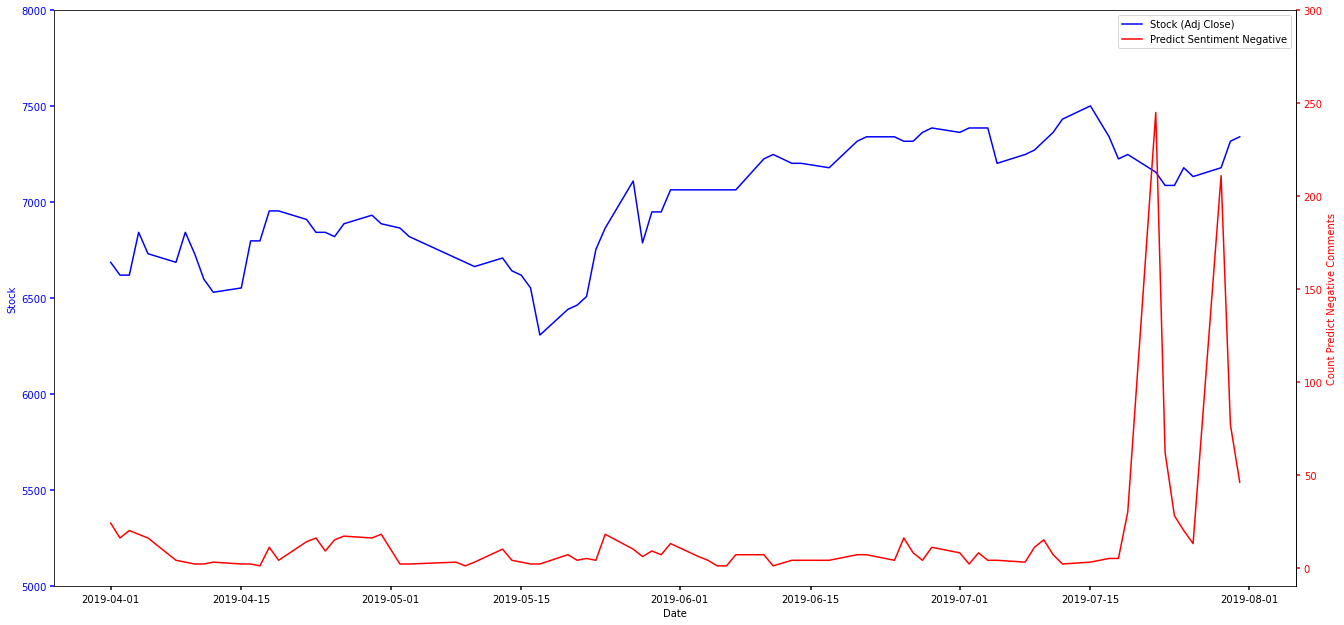

In [90]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, host = plt.subplots()
fig.subplots_adjust(right=3, top = 6,bottom = 4)

# par1 = host.twinx()
par2 = host.twinx()


make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(df_corr_sent_min['Date'], df_corr_sent_min['Adj Close'], "b-", label="Stock (Adj Close)")
# p2, = par1.plot(sum_label_sent_final_neg['Date'], sum_label_sent_final_neg['SumLabel'], "r-", label="Negative")
p3, = par2.plot(df_corr_sent_min['Date'], df_corr_sent_min['SumLabelPredict'], "r-", label="Predict Sentiment Negative")

# host.set_xlim(0, 2)
host.set_ylim(5000,8000)
# par1.set_ylim(sum_label_sent_final_neg['SumLabel'].min(), sum_label_sent_final_neg['SumLabel'].max())
par2.set_ylim(-10,300)
# par2.set_ylim(7000,0)

host.set_xlabel("Date")
host.set_ylabel("Stock")
# par1.set_ylabel("Negative")
par2.set_ylabel("Count Predict Negative Comments")

host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

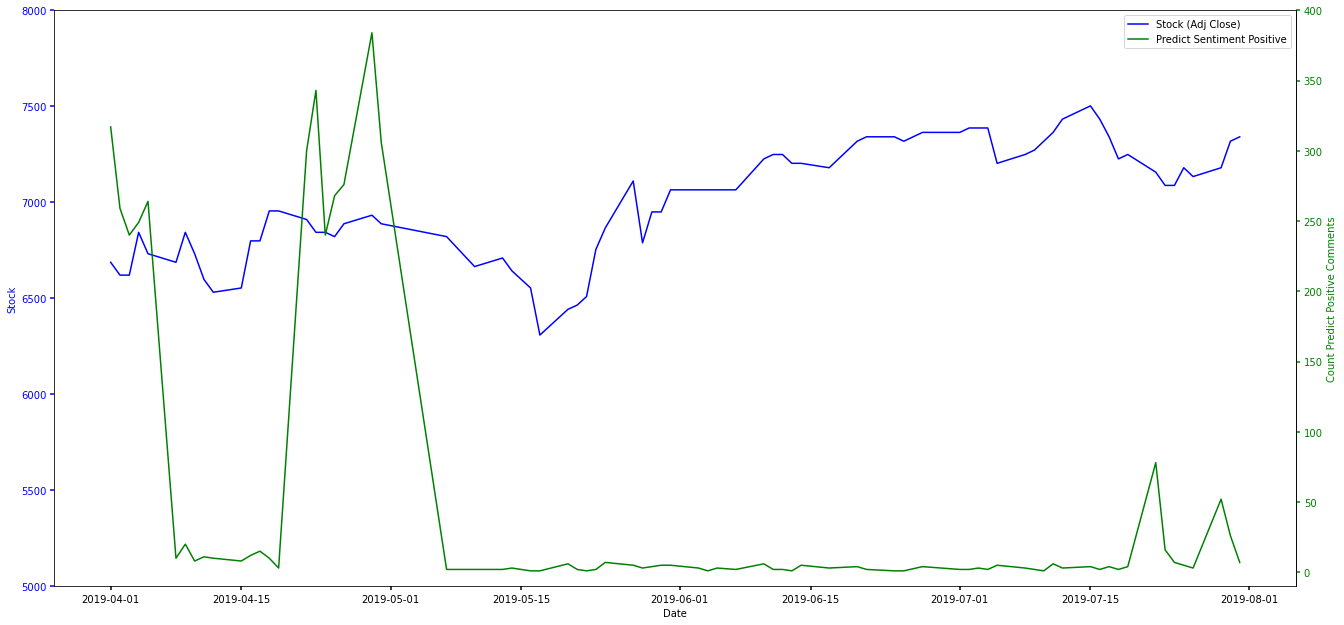

In [89]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, host = plt.subplots()
fig.subplots_adjust(right=3, top = 6,bottom = 4)

# par1 = host.twinx()
par2 = host.twinx()


make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(df_corr_sent_plus['Date'], df_corr_sent_plus['Adj Close'], "b-", label="Stock (Adj Close)")
# p2, = par1.plot(sum_label_sent_final_neg['Date'], sum_label_sent_final_neg['SumLabel'], "r-", label="Negative")
p3, = par2.plot(df_corr_sent_plus['Date'], df_corr_sent_plus['SumLabelPredict'], "g-", label="Predict Sentiment Positive")

# host.set_xlim(0, 2)
host.set_ylim(5000, 8000)
# par1.set_ylim(sum_label_sent_final_neg['SumLabel'].min(), sum_label_sent_final_neg['SumLabel'].max())
par2.set_ylim(-10,400)

host.set_xlabel("Date")
host.set_ylabel("Stock")
# par1.set_ylabel("Negative")
par2.set_ylabel("Count Predict Positive Comments")

host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [77]:
df_corr_sent_min.corr()

,Open,High,Low,Close,Adj Close,Volume,Label Predict,SumLabelPredict
Open,1.000000,0.944204,0.949076,0.896536,0.885644,0.052550,NaN,0.102733
High,0.944204,1.000000,0.931756,0.943511,0.907525,0.226522,NaN,0.090593
Low,0.949076,0.931756,1.000000,0.957759,0.931703,-0.032557,NaN,0.084273
Close,0.896536,0.943511,0.957759,1.000000,0.960382,0.055833,NaN,0.109392
Adj Close,0.885644,0.907525,0.931703,0.960382,1.000000,0.057239,NaN,0.146384
Volume,0.052550,0.226522,-0.032557,0.055833,0.057239,1.000000,NaN,-0.016594
Label Predict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumLabelPredict,0.102733,0.090593,0.084273,0.109392,0.146384,-0.016594,NaN,1.000000


In [78]:
df_corr_sent_plus.corr()

,Open,High,Low,Close,Adj Close,Volume,Label Predict,SumLabelPredict
Open,1.000000,0.944585,0.949374,0.896176,0.886713,0.090258,NaN,-0.151350
High,0.944585,1.000000,0.932865,0.943372,0.908104,0.262286,NaN,-0.156055
Low,0.949374,0.932865,1.000000,0.957739,0.932346,0.005974,NaN,-0.141591
Close,0.896176,0.943372,0.957739,1.000000,0.960777,0.097139,NaN,-0.142826
Adj Close,0.886713,0.908104,0.932346,0.960777,1.000000,0.102638,NaN,-0.284546
Volume,0.090258,0.262286,0.005974,0.097139,0.102638,1.000000,NaN,-0.035399
Label Predict,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SumLabelPredict,-0.151350,-0.156055,-0.141591,-0.142826,-0.284546,-0.035399,NaN,1.000000
